In [1]:
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lyubishchev.cli import last
from lyubishchev.report import get_highlights
from nb_helper_time_interval_metrics import draw_bar_chart_se_work, draw_bars_chart
from nb_helper_time_stats import show_time_stat_as_piechart

from icecream import ic
ic.disable()

report = last(10)
time_interval_metrics = report.get_interval_metrics()

high_lights = get_highlights(report)

ic(high_lights)

{'self_improving': 'Total time: 32.23h, daily average: 3.22h',
 'work': 'Total time: 30.2h, daily average: 3.77h',
 'effective_output': 'Total time: 62.43h, daily average: 6.24h',
 'sex': 'day has sex: 3/10, happens every 3.33 days. total hour/every time avg 1.58/0.53h',
 'sleep': 'average nap 0.42h, day has nap 5/10, happens every 2.0 days. average nightly sleep 8.0h, average all sleep time 8.42h',
 'meditation': 'daily meditation: 0.11h days with meditation: 7/10, happends every 1.43 days',
 'exercise': 'daily exercise: 0.21h, days with exercise: 5/10, happens every 2.0 days'}

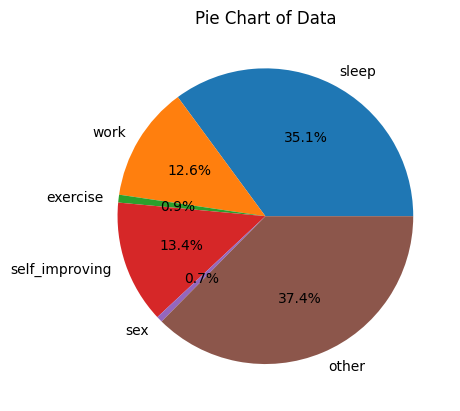

In [2]:
show_time_stat_as_piechart(report.get_time_stats())

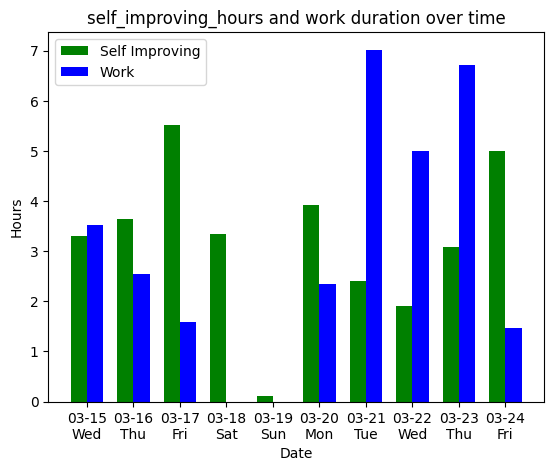

effective_output:		 Total time: 62.43h, daily average: 6.24h
self_improving:			 Total time: 32.23h, daily average: 3.22h
work:				 Total time: 30.2h, daily average: 3.77h


In [3]:
draw_bar_chart_se_work(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    self_improving_minutes=time_interval_metrics["effective_output"]["self_improving"],
    work_minutes=time_interval_metrics["effective_output"]["work"],
)
print("effective_output:\t\t", high_lights["effective_output"])
print("self_improving:\t\t\t", high_lights["self_improving"])
print("work:\t\t\t\t", high_lights["work"])

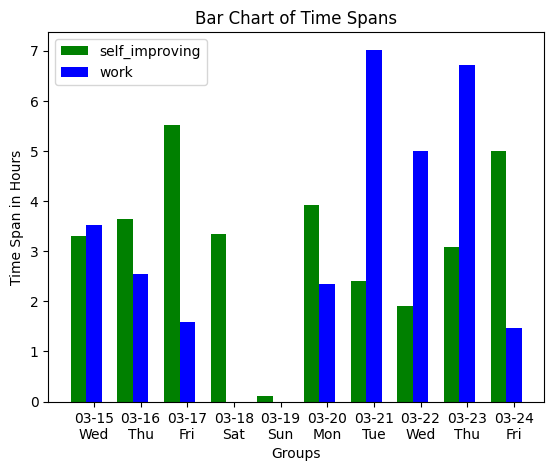

In [7]:
# effective output
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "self_improving": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["effective_output"]["self_improving"],
        },
        "work": {
            "color": "blue",
            "time_span_minutes": time_interval_metrics["effective_output"]["work"],
        },
    }
)

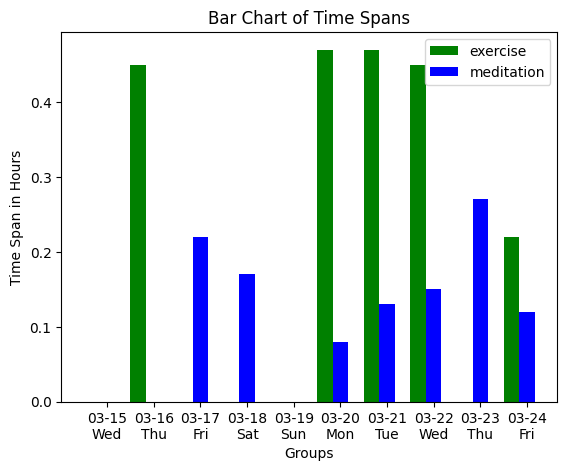

In [8]:
# self calm
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "exercise": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["exercise"],
        },
        "meditation": {
            "color": "blue",
            "time_span_minutes": time_interval_metrics["meditation"],
        },
    }
)

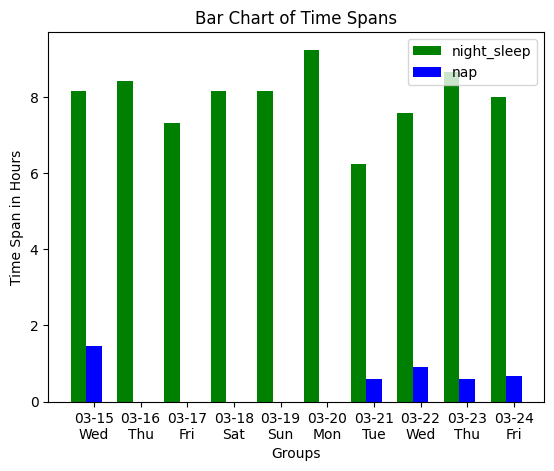

In [9]:
# sleep
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "night_sleep": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["sleep"]["night_sleep"],
        },
        "nap": {
            "color": "blue",
            "time_span_minutes": time_interval_metrics["sleep"]["nap"],
        },
    }
)

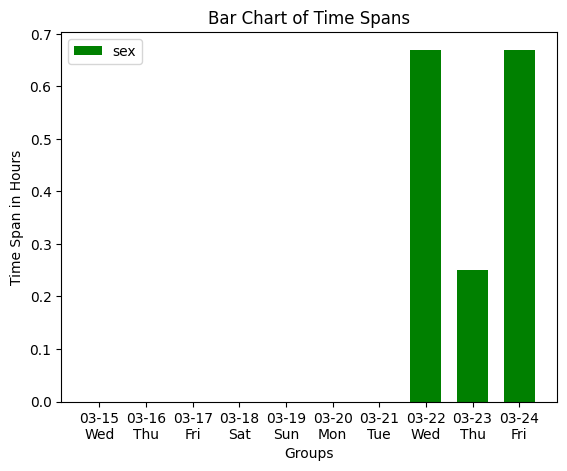

In [10]:
# human connection: sex, family, joyful
draw_bars_chart(
    dates=report.dates(),
    day_timestamps=report.get_event_metrics()["wakeup"],
    bar_list={
        "sex": {
            "color": "green",
            "time_span_minutes": time_interval_metrics["sex"],
        },
    }
)

In [6]:
# time I regret: numb, dispute, pmo